In [26]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from inspect import signature
from pprint import pprint as pp

In [27]:
import warnings
warnings.filterwarnings(action = 'ignore')

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size = 9)
plt.rc('font', family = 'NanumBarunGothic')
mpl.font_manager._rebuild()

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [28]:
df_search1 = pd.read_csv('../Project_data/data/Search1.csv')
df_segs = pd.read_csv('../Project_data/data/segs.csv')
df_customer = pd.read_csv('../Project_data/data/Custom.csv')

In [115]:
df_search1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884943 entries, 0 to 2884942
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   CLNT_ID     int64 
 1   SESS_ID     int64 
 2   KWD_NM      object
 3   SEARCH_CNT  int64 
dtypes: int64(3), object(1)
memory usage: 88.0+ MB


In [29]:
df_search1.head()

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


## 성별에 따라 TOP5 검색 키워드 

In [30]:
from collections import Counter

In [31]:
a = df_search1.KWD_NM

In [32]:
type(a)

pandas.core.series.Series

In [33]:
df_customer.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30


In [34]:
df_search1.head()

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


In [35]:
df_merge = pd.merge(left = df_customer, right = df_search1, how = 'inner', on='CLNT_ID')
df_merge.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE,SESS_ID,KWD_NM,SEARCH_CNT
0,4830726,F,30,2546785,에스까다 선글라스,1
1,4830726,F,30,2546785,끌로에 선글라스,1
2,4830726,F,30,2546785,페라가모 선글라스,1
3,4830726,F,30,2546785,톰포드선글라스,1
4,4825325,F,30,3365352,타미힐피거키즈티셔츠,1


In [36]:
a = df_merge.KWD_NM
a

0           에스까다 선글라스
1            끌로에 선글라스
2           페라가모 선글라스
3             톰포드선글라스
4          타미힐피거키즈티셔츠
              ...    
2297719         하루견과류
2297720       퀵실버 보드숏
2297721           견과류
2297722       라푸마 롱패딩
2297723            짐볼
Name: KWD_NM, Length: 2297724, dtype: object

In [37]:
count = Counter(a)
topKeyword = count.most_common(5)
topKeyword

[('원피스', 5319), ('생수', 4639), ('뉴발란스키즈', 4542), ('에고이스트', 4207), ('나스', 3955)]

In [38]:
df_female = df_merge.groupby('CLNT_GENDER')
df_female.head(10)

,CLNT_ID,CLNT_GENDER,CLNT_AGE,SESS_ID,KWD_NM,SEARCH_CNT
0,4830726,F,30,2546785,에스까다 선글라스,1
1,4830726,F,30,2546785,끌로에 선글라스,1
2,4830726,F,30,2546785,페라가모 선글라스,1
3,4830726,F,30,2546785,톰포드선글라스,1
4,4825325,F,30,3365352,타미힐피거키즈티셔츠,1
5,4825325,F,30,3606834,닥스키즈원피스,1
6,4825325,F,30,3365352,블루독원피스,1
7,4825325,F,30,2943346,밍크뮤패딩,1
8,4825325,F,30,3606834,타미힐피거키즈,3
9,4825325,F,30,3606834,타미힐피거키즈원피스,1


In [39]:
df_female = df_merge[df_merge['CLNT_GENDER'] == 'F']
df_male = df_merge[df_merge['CLNT_GENDER'] == 'M']

In [40]:
df_female.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE,SESS_ID,KWD_NM,SEARCH_CNT
0,4830726,F,30,2546785,에스까다 선글라스,1
1,4830726,F,30,2546785,끌로에 선글라스,1
2,4830726,F,30,2546785,페라가모 선글라스,1
3,4830726,F,30,2546785,톰포드선글라스,1
4,4825325,F,30,3365352,타미힐피거키즈티셔츠,1


In [41]:
df_male.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE,SESS_ID,KWD_NM,SEARCH_CNT
47,4846440,M,40,7262779,기름종이,1
48,4846440,M,40,6149351,테팔 인덕션 후라이팬,1
49,4846440,M,40,2667612,로지텍g102,1
50,4846440,M,40,6149351,휘슬러 후라이팬,2
51,4846440,M,40,6149351,락앤락 수박,1


In [42]:
b = df_female.KWD_NM

In [43]:
count = Counter(b)
female_keyword = count.most_common(5)
female_keyword

[('원피스', 5055), ('뉴발란스키즈', 4195), ('에고이스트', 3991), ('나스', 3827), ('생수', 3798)]

In [44]:
c = df_male.KWD_NM
count = Counter(c)
male_keyword = count.most_common(5)
male_keyword

# type(male_keyword)

[('생수', 841), ('나이키', 722), ('지오다노', 603), ('나이키운동화', 556), ('정관장', 445)]

In [45]:
female_keyword = pd.DataFrame({
    'KEYWORD' : ['원피스', '뉴발란스키즈' , '에고이스트', '나스', '생수'],
    'COUNT' : [ 5055, 4195, 3991, 3827, 3798 ]
})

female_keyword.head()

,KEYWORD,COUNT
0,원피스,5055
1,뉴발란스키즈,4195
2,에고이스트,3991
3,나스,3827
4,생수,3798


In [46]:
male_keyword = pd.DataFrame({
    'KEYWORD' : ['생수', '나이키' , '지오다노', '나이키운동화', '정관장'],
    'COUNT' : [ 841, 722, 603, 556, 445 ]
})

male_keyword.head()

,KEYWORD,COUNT
0,생수,841
1,나이키,722
2,지오다노,603
3,나이키운동화,556
4,정관장,445


Text(0, 0.5, '검색 횟수')

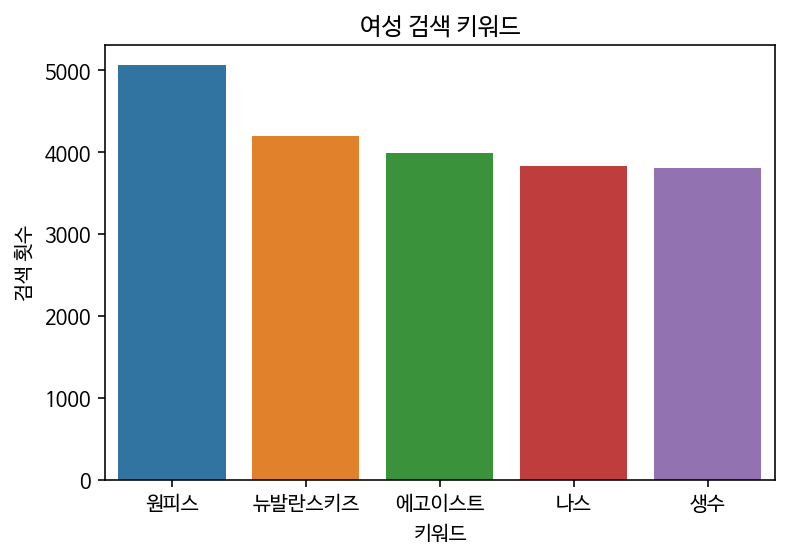

In [47]:
grid = plt.subplots()
grid = sns.barplot(x='KEYWORD', y='COUNT', data=female_keyword)
grid.set_title('여성 검색 키워드')
grid.set_xlabel('키워드')
grid.set_ylabel('검색 횟수')
# grid2 = frame.add_subplot(1,2,2)

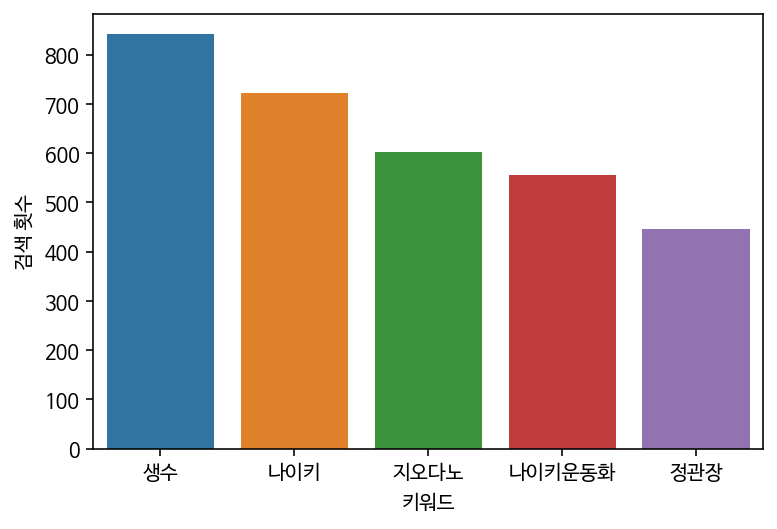

In [48]:
grid2 = plt.subplots()
grid2 = sns.barplot(x='KEYWORD', y='COUNT', data=male_keyword)
grid.set_title('남성 검색 키워드')
grid2.set_xlabel('키워드')
grid2.set_ylabel('검색 횟수')
plt.show()

In [88]:
df_kids = df_merge[df_merge.KWD_NM.str.contains('키즈')]
df_kids.head()

# df_kids.info()

,CLNT_ID,CLNT_GENDER,CLNT_AGE,SESS_ID,KWD_NM,SEARCH_CNT
4,4825325,F,30,3365352,타미힐피거키즈티셔츠,1
5,4825325,F,30,3606834,닥스키즈원피스,1
8,4825325,F,30,3606834,타미힐피거키즈,3
9,4825325,F,30,3606834,타미힐피거키즈원피스,1
10,4825325,F,30,3606834,타미힐피거키즈셔츠,1


In [90]:
df_kids2 = pd.merge(left = df_segs, right = df_kids, how='inner', on='CLNT_ID')
df_kids2

,CLNT_ID,PD_BUY_TOT,BUY_COUNT,CUS_SEG,CLNT_GENDER,CLNT_AGE,SESS_ID,KWD_NM,SEARCH_CNT
0,3320292,739290,21,2,F,30,9026464,아디다스키즈,2
1,3320292,739290,21,2,F,30,2559245,나이키키즈반바지,1
2,3320292,739290,21,2,F,30,2559245,아디다스키즈반바지,1
3,3320292,739290,21,2,F,30,2559245,아디다스키즈티셔츠,1
4,3591226,3083150,243,2,F,30,9354476,트윈키즈 바지,2
...,...,...,...,...,...,...,...,...,...
112828,517438,153100,6,4,F,30,9976805,휠라키즈,1
112829,917987,93800,4,4,F,40,6858145,버켄스탁 키즈,1
112830,242982,103000,4,4,F,30,9369532,키즈 샌들,1
112831,2203528,150500,5,4,F,30,9618750,게스키즈,1


In [94]:
df_kids3 = df_kids2.CLNT_ID.drop_duplicates()
df_kids3 = df_kids3.to_frame()
df_kids3

,CLNT_ID
0,3320292
4,3591226
7,5360839
8,5428385
10,5454345
...,...
112827,517438
112829,917987
112830,242982
112831,2203528


In [96]:
df_cus_seg = pd.merge(left = df_customer, right = df_segs, how = 'inner', on = 'CLNT_ID')
df_cus_seg

,CLNT_ID,CLNT_GENDER,CLNT_AGE,PD_BUY_TOT,BUY_COUNT,CUS_SEG
0,4830726,F,30,260000,2,1
1,4830874,F,40,276000,4,2
2,4830975,F,30,104300,2,3
3,4831275,F,30,71400,2,3
4,4825325,F,30,529700,11,2
...,...,...,...,...,...,...
671656,3725302,F,40,29000,1,3
671657,3725462,M,40,35700,2,3
671658,3725818,F,30,143400,2,3
671659,3661812,F,30,15600,4,4


In [97]:
df_kidskeyword = pd.merge(left = df_kids3, right = df_cus_seg, how = 'inner', on = 'CLNT_ID')
df_kidskeyword

,CLNT_ID,CLNT_GENDER,CLNT_AGE,PD_BUY_TOT,BUY_COUNT,CUS_SEG
0,3320292,F,30,739290,21,2
1,3591226,F,30,3083150,243,2
2,5360839,F,30,888900,13,2
3,5428385,F,40,726500,14,2
4,5454345,F,30,609150,15,2
...,...,...,...,...,...,...
41671,517438,F,30,153100,6,4
41672,917987,F,40,93800,4,4
41673,242982,F,30,103000,4,4
41674,2203528,F,30,150500,5,4


In [51]:
signature(sns.FacetGrid)

<Signature (data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)>

## 그룹별 연령에 따른 '키즈'키워드 검색 횟수

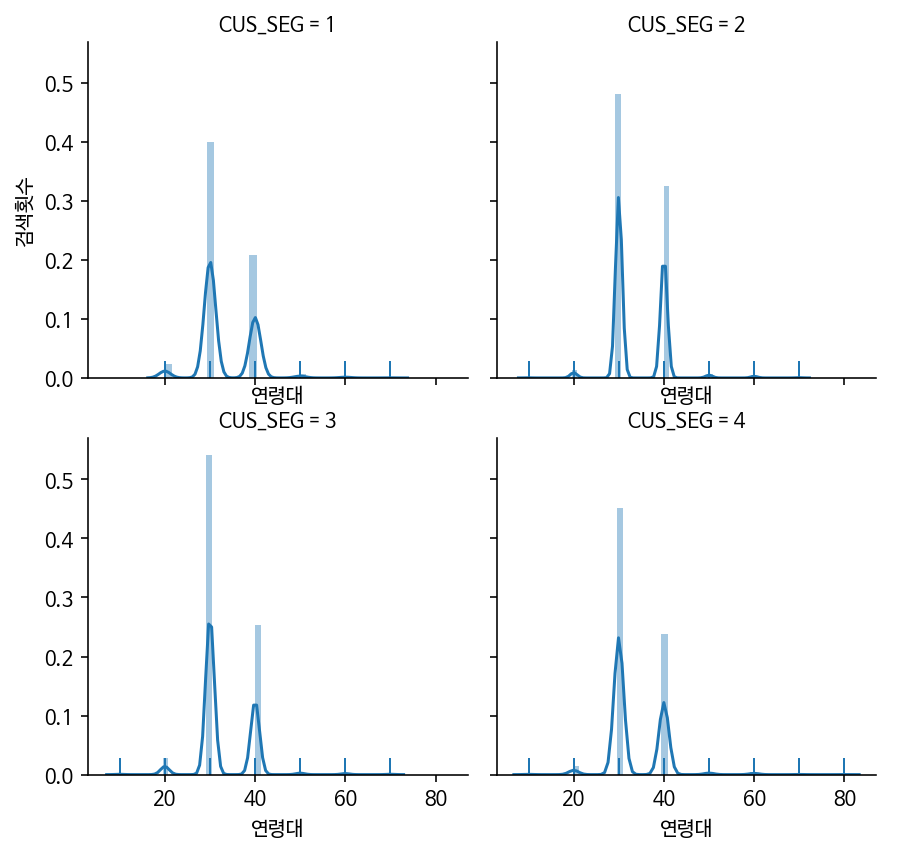

In [98]:
facet2 = sns.FacetGrid(df_kidskeyword, col='CUS_SEG', col_wrap = 2)
facet2 = facet2.map(sns.distplot, 'CLNT_AGE', rug=True)
facet2 = facet2.add_legend()

axes = facet2.axes.flatten()
axes[0].set_ylabel("검색횟수")
for ax in axes:
    ax.set_xlabel("연령대")

In [100]:
df_kidskeyword

,CLNT_ID,CLNT_GENDER,CLNT_AGE,PD_BUY_TOT,BUY_COUNT,CUS_SEG
0,3320292,F,30,739290,21,2
1,3591226,F,30,3083150,243,2
2,5360839,F,30,888900,13,2
3,5428385,F,40,726500,14,2
4,5454345,F,30,609150,15,2
...,...,...,...,...,...,...
41671,517438,F,30,153100,6,4
41672,917987,F,40,93800,4,4
41673,242982,F,30,103000,4,4
41674,2203528,F,30,150500,5,4


In [ ]:
boxplot = pt.figure()
axes1 = boxplot.add_subplot()

axes1.boxplot(df_kidskeyword[df_kidskeyword.])

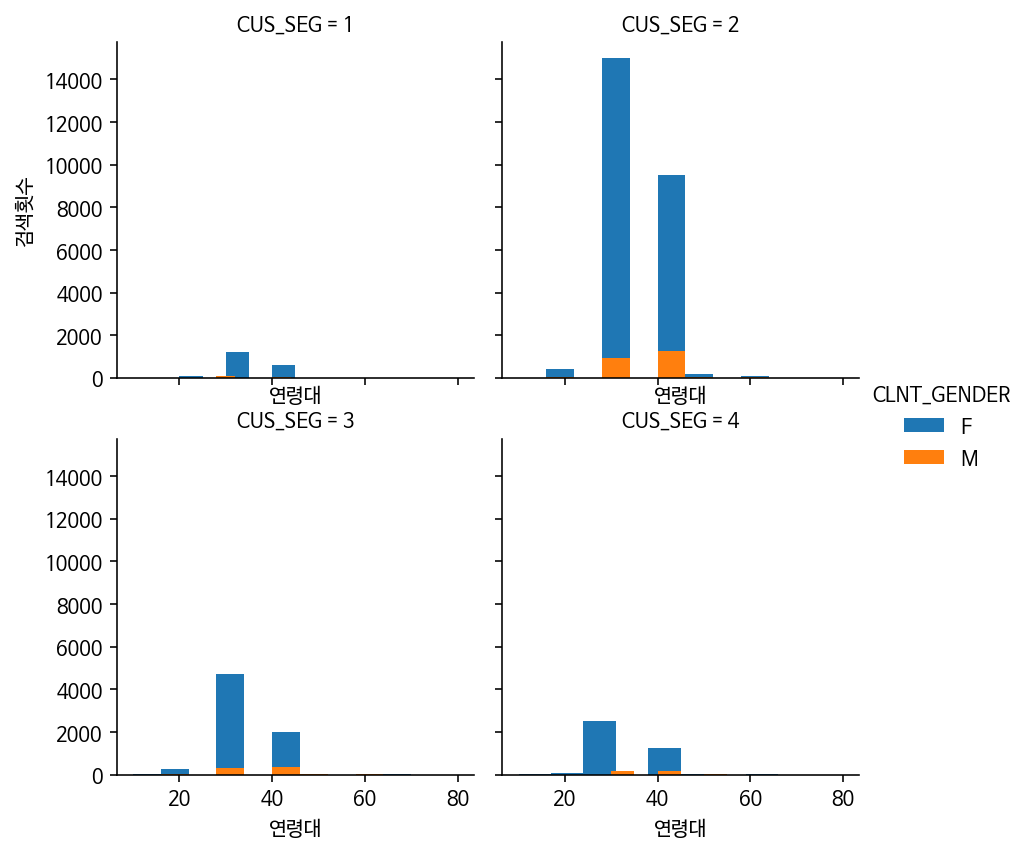

In [113]:
facet3 = sns.FacetGrid(df_kidskeyword, col='CUS_SEG', hue='CLNT_GENDER', col_wrap = 2)
facet3 = facet3.map(plt.hist, 'CLNT_AGE')
facet3 = facet3.add_legend()

axes = facet3.axes.flatten()
axes[0].set_ylabel("검색횟수")
for ax in axes:
    ax.set_xlabel("연령대")